# **AISaturdays Ocean Proximity Challenge**

![AISaturdays](https://www.saturdays.ai/assets/images/ai-saturdays-122x122.png)

Bienvenido al reto de **AISaturdays** de Inteligencia Artificial del curso de Deep Learning.

En este ejercicio trataremos de predecir la proximidad del océano con respecto a un conjunto de viviendas.

**Enlaces:**
- AISaturdays Deep Learning [temario clase 1](https://app.eduflow.com/courses/d4d36f90-f65e-4ede-b8f3-16f498ce3a33/flows/98016aaa-4e29-428f-a8f9-d5d9477d7274/activities/d9f00e62-0403-4a21-bdae-c6a3ea2984e5).
- Ejercicio Kaggle: https://www.kaggle.com/camnugent/california-housing-prices

**Instrucciones:**
- Se usará el lenguaje de programación Python 3.
- Se usarán las librerías de python: *Pandas, MatPlotLib, Numpy, Scikit-learn, Keras,TensorFlow*.

**Mediante este ejercicio, aprenderemos:**
- Entender y ejecutar los NoteBooks con Python.
- Ser capaz de utilizar funciones de Python y librerías adicionales.
- Dataset:
 - Obtener el dataset y previsualizar la información del dataset.
 - Limpiar y normalizar la información del dataset.
 - Representar y analizar la información del dataset.
- Crear y entender el concepto de "*Conjunto de datos de entrenamiento*" y "*Conjuntos de datos de test*"
- Crear y entender el concepto de "*Modelo de redes neuronales*" para procesar los datos,  predecir y obtener conclusiones.
- Mejorar la predicción y evitar overfitting.


¡Empecemos!

#1. Importación de librerías


*Importaremos* las herramientas que vamos a utilizar.
Para ejecutar cada celda(caja), pulsa el play de la izquierda o **Ctrl + Enter**.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import tensorflow as tf

#2. Dataset
![texto alternativo](https://i.imgur.com/TMvhIbd.png)

### Obtener el dataset y previsualizar la información del dataset.

¡Nuestra tabla! Para poder visualizar y limpiar los datos convertiremos el archivo CSV.

Los datos se almacenarán en un dataframe llamado **df**.

In [21]:
# Sólo con una línea de código
df = pd.read_csv("C:\\Users\\Lenovo\\Desktop\\IASM_greiffindor_24\\AISM_greiffindor_24\\1 Artificial Neuronal Networks (ANN)\\housing.csv")

1. Tu turno. Muestra los primeros valores del archivo CSV para hacernos una idea del contenido de la tabla con el código: df.head()


---

In [22]:
# Sólo con una línea de código
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Variables

* **longitude:** Valor longitude de la coordenada.
* **latitude:** Valor latitude de la coordenada.
* **housing_median_age:** Edad media de las viviendas de esta zona.
* **total_rooms:** Total de habitaciones.
* **total_bedrooms:** Total de camas.
* **population:** Población en esta zona. Importante denotar que también es un valor total.
* **households:** Viviendas en esta zona. Importante denotar que también es un valor total.
* **median_income:** Salario medio de las personas de esta zona.
* **median_house_value:** Valor medio de la vivienda de esta zona.
* **ocean_proximity:**  ¡El resultado! Significa la proximidad del océano con respecto a las viviendas de esta zona. Si nos fijamos, este campo contiene valores de cadena (etiquetas) para determinar la proximidad.



### Analizar dataset:

Para entender la distribución de los datos, vamos a observar:

- La cantidad de datos (count)
- La distribución de los datos mediante cuartiles (25%,50%,75%)
- Media de los datos (mean)
- Mínimos y máximos (min, max)
- Varianza (std)
- ...

2. Utiliza la función .describe() para analizar la distribución de los datos


---

In [23]:
# Sólo con una línea de código
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualicemos el contenido para hacernos una idea de la distribución de las viviendas por población y precio.

*   Es la zona de California, y al suroeste donde terminan los círculos, comieza el océano.
![California](https://california.azureedge.net/cdt/CAgovPortal/images/Uploads/menu-living.jpg)
*   El precio se indica con color rojo para las viviendas más caras.
*   Las viviendas más cercanas al océano se encuentran por lo tanto en la costa de California.




<Figure size 1000x700 with 0 Axes>

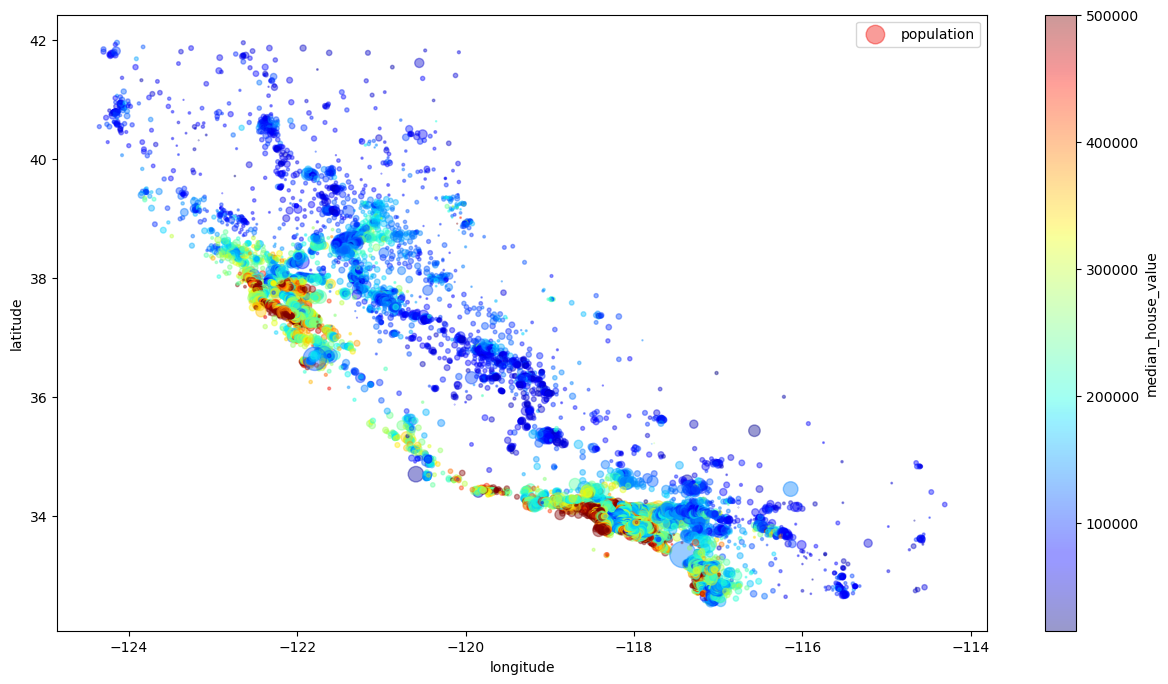

In [24]:
# Ejecutar el siguiente código
plt.figure(figsize=(10,7))
plotter = df.copy()
plotter.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=plotter["population"]/100, label="population", figsize=(15,8), c="median_house_value", cmap=plt.get_cmap("jet"),colorbar=True, )
plt.legend()

### Limpiar y normalizar la información del dataset
![texto alternativo](https://i.imgur.com/8u4xTI7.png)

En este apartado se pretende corregir y mejorar información en el dataset que pueda faltar, sea inconsistente o no sea correcta.

Este paso es necesario para mejorar cualquier predicción futura que se realice con el dataset.

Existen diferentes técnicas para corregir y mejorar la calidad e integridad de información de nuestro dataset. 

Como futura lectura, recomendamos el siguiente enlace con [técnicas de mejora del dato](https://www.kaggle.com/pavansanagapati/simple-tutorial-how-to-handle-missing-data).



3. Muestra el sumatorio de los valores nulos del dataset: df.isnull()...
[Documentación](https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe)


---

In [25]:
# Sólo con una línea de código
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

4. Elimina las filas que tengan valores a 0: df.dropna(...) [Documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

---

In [26]:
# Sólo con una línea de código
df.dropna(axis=1, inplace=True)


### Analizar relaciones de la información del dataset

5. ¿Cual de estas variables está relacionada con la proxímidad del océano y cúal no? ¿Están relacionadas entre sí? **Explícalo a continuación**

---

A mayor cercanía de la costa, mayor valor.

Median_house value y ocean_proximity están relacionadas entre sí. A mayor cercanía de la costa, mayor valor. También puede ser population ya que más personas quieren vivir cerca del agua.


---

Crear una matriz de correlación visual. [Pista](https://datascienceplus.com/visualize-correlation-matrices-in-python/)

6. Crea una matriz de correlación visual usando .corr()


---

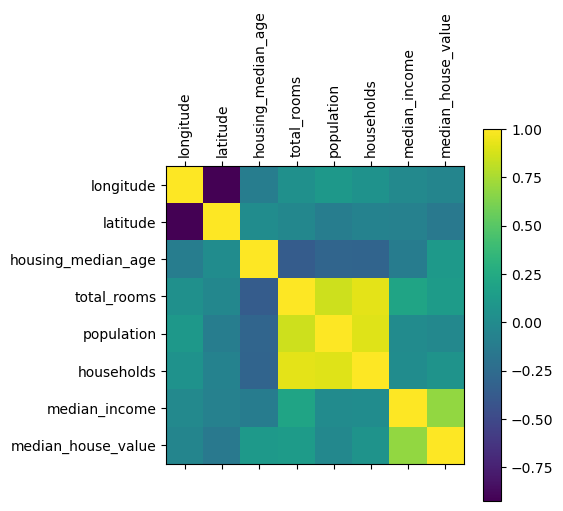

In [27]:
# Dos líneas de código
df_corr = df.corr()
# plot de df_corr con matplotlib
plt.matshow(df_corr)
# mostrar el nombre de las columnas
plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr.columns)), df_corr.columns)
plt.colorbar()
plt.show()

! Fíjate en todas posibles feature de la tabla de arriba que indican "**valores  totales**". (Pista: algunas de ellas no llevan el prefijo *total_* )

Estas features de totales nos indican los valores en una zona concreta de un grupo de viviendas. Para mejorar la predicción de nuestro modelo, nos conviene obtener los valores individuales por vivienda.

Los datasets no suelen ser perfectos, hay datos incompletos e incorrectos que reducen la eficiencia del modelo. Por ello necesitamos limpiarlo. [Pista](https://new.paradigmadigital.com/wp-content/uploads/2019/02/Pandas_cheatsheet.pdf)

7. ¿Qué features están agrupadas por totales? ¿Con qué feature se agrupan y tienen más relación? (Pista: hay tres)

---

Las features agrupadas por locales son Total_rooms, population y household

In [28]:
print(df_corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    population  households  median_income  median_house_value  
longitude             0.099773    0.055310      -0.015176           -0.045967  
latitude             -0.108785   -0.071035      -0.079809           -0.144160  
housing_median_age   -0.296244   -0.302916      -0.119034            0.1056

Total_room se agrupa con polulation = 1 y houselhold = 0.9
Population se agrupa con total:room = 0,91 y houselhold = 1
houselhold se agrupa con population = 0.9 y total_room = 0.91

8. De las feature agrupadas por totales, obtén las feature invididuales dividiéndolas por las que las agrupa, y añádelas al dataframe
---

In [29]:
# Tres líneas de código
df['room_per_household'] = df['total_rooms'] / df['households']
df['households_per_population'] = df['households'] / df['population']
df['person_per_room'] = df['population'] / df['total_rooms']


9. Elimina del dataset las feature de totales agrupadas
---

In [30]:
# Sólo con una línea de código
df.drop(['total_rooms', 'households', 'population'], axis=1, inplace=True)

10. Crea de nuevo una matriz de correlación visual usando .corr() para ver las nuevas feature añadidas y su correlación


---

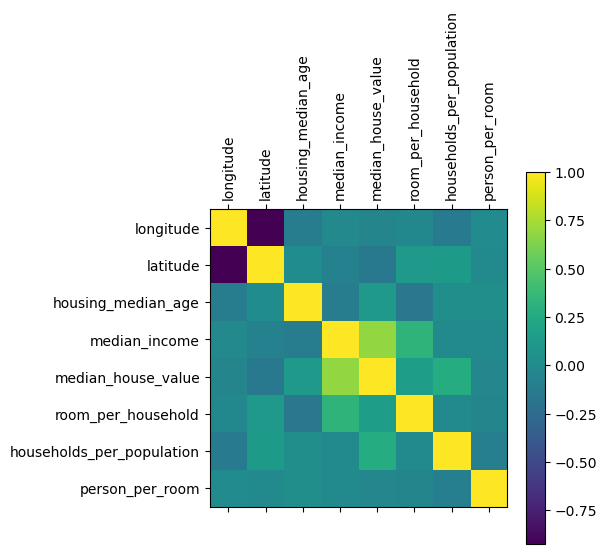

In [31]:
# Dos líneas de código
df_corr = df.corr()
# plot de df_corr con matplotlib
plt.matshow(df_corr)
# mostrar el nombre de las columnas
plt.xticks(range(len(df_corr.columns)), df_corr.columns, rotation=90)
plt.yticks(range(len(df_corr.columns)), df_corr.columns)
plt.colorbar()
plt.show()

! Fíjate como ahora al haber procesado y quitado las feature de totales, hemos eliminado algunas correlaciones y la matriz nos muestra correlaciones más coherentes que nos ayudarán a mejorar la predicción de nuestro modelo.



13. Obtén los valores únicos de la feature de la que queremos obtener la predicción (ocean_proximity)


---

In [32]:
# Dos líneas de código
print(df["ocean_proximity"].unique())

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


*14*. Explica qué ves en los valores anteriores. 


---

*   Explica aquí qué ves en los valores anteriores que deba mejorarse




Los valores pueden mejorarse si se transforman a valores numéricos

---

15. Mejora el dataframe con el análisis anterior


---

In [33]:
# Sólo con una línea de código
df ["ocean_proximity"] = df["ocean_proximity"].replace({"<1H OCEAN": 1, "INLAND": 2, "NEAR OCEAN": 3, "NEAR BAY": 4, "ISLAND": 5})  


### Normalizar las feature para nuestro modelo

![texto alternativo](https://i.imgur.com/o7YvGRe.png)


Ahora deberemos proceder a normalizar el resto de variables para que la escala de valores entre ellas sea similar y facilite el procesamiento a nuestro modelo y se logre mejorar la predicción (*Feature Scaling*).
Este paso es fundamental antes de entrenar nuestro modelo.

Puesto que la **función de activación** de nuestro modelo será '**softmax**', cuyos valores son de una escala entre -1 a 1, debemos normalizar las feature en este intervalo. [Pista](https://books.google.es/books?id=M5RRDwAAQBAJ&pg=PA137&lpg=PA137&dq=scaler.fit_transform+values.reshape&source=bl&ots=zzDuEQUdQR&sig=ACfU3U1NPGvTLq46zc-pJwcexE3wGKHQPw&hl=es&sa=X&ved=2ahUKEwi1qtPZ9MDnAhXdDWMBHc-MB0UQ6AEwDXoECAgQAQ#v=onepage&q=scaler.fit_transform%20values.reshape&f=false)

16. Normaliza las feature a la escala de softmax y añádelas al dataframe.


---

In [35]:
# standardscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
df = scaler.transform(df)
df = pd.DataFrame(df, columns = ["longitude", "latitude", "housing_median_age", "median_income", "median_house_value", "ocean_proximity", "room_per_household", "households_per_population", "person_per_room"])
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,room_per_household,households_per_population,person_per_room
0,-1.327835,1.052548,0.982143,2.344766,2.129631,2.081811,0.628559,0.289736,-0.087627
1,-1.322844,1.043185,-0.607019,2.332238,1.314156,2.081811,0.327041,1.175160,-0.097193
2,-1.332827,1.038503,1.856182,1.782699,1.258693,2.081811,1.155620,-0.079253,-0.097232
3,-1.337818,1.038503,1.856182,0.932968,1.165100,2.081811,0.156966,0.302255,-0.062727
4,-1.337818,1.038503,1.856182,-0.012881,1.172900,2.081811,0.344711,1.008474,-0.094068


In [16]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

scaled_data = minmax.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,room_per_household,households_per_population,person_per_room
0,0.211155,0.567481,0.784314,0.539668,0.902266,0.75,0.043512,0.270497,0.000886
1,0.212151,0.565356,0.392157,0.538027,0.708247,0.75,0.038224,0.327758,0.000815
2,0.210159,0.564293,1.000000,0.466028,0.695051,0.75,0.052756,0.246634,0.000815
3,0.209163,0.564293,1.000000,0.354699,0.672783,0.75,0.035241,0.271306,0.001069
4,0.209163,0.564293,1.000000,0.230776,0.674638,0.75,0.038534,0.316978,0.000838


17. Utiliza la función .describe() para analizar la distribución de los datos


---

In [36]:
# Sólo con una línea de código

df.describe()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,room_per_household,households_per_population,person_per_room
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-6.527810e-15,1.256263e-15,8.557001e-16,3.734255e-16,8.950635e-16,-2.186529e-14,2.704111e-16,-6.020970e-17,1.546022e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385992e+00,-1.447568e+00,-2.196180e+00,-1.774299e+00,-1.662641e+00,-9.046758e-01,-1.852319e+00,-3.892913e+00,-2.077719e-01
25%,-1.113209e+00,-7.967887e-01,-8.453931e-01,-6.881186e-01,-7.561633e-01,-9.046758e-01,-3.994496e-01,-6.382262e-01,-6.357949e-02
50%,5.389137e-01,-6.422871e-01,2.864572e-02,-1.767951e-01,-2.353337e-01,9.081967e-02,-8.078489e-02,-1.007586e-01,-3.577489e-02
75%,7.784964e-01,9.729566e-01,6.643103e-01,4.593063e-01,5.014973e-01,9.081967e-02,2.519615e-01,5.067637e-01,1.288144e-02
max,2.625280e+00,2.958068e+00,1.856182e+00,5.858286e+00,2.540411e+00,3.077306e+00,5.516324e+01,1.156993e+01,1.354173e+02


El método min max scaler es una técnica de normalización que transforma los datos en un rango de 0 a 1. No entre -1 y 1 como se pide en el ejercicio. Tras haber usado standard scaler, los valores se encuentran entre -1 y 1.

# 3. Modelo redes neuronales

El modelo de [redes neuronales](https://pathmind.com/wiki/neural-network) es una serie de algoritmos que logran reconocer patrones y correlaciones en un conjunto de datos a través de un proceso que simula el funcionamiento del cerebro con la finalidad de determinar predicciones que puedan interesarnos.

En Deep Learning uno de los usos más frecuentes del modelo de redes neuronales es el caso de análisis de datos en [aprendizaje supervisado](https://es.wikipedia.org/wiki/Aprendizaje_supervisado).



**Ejemplo genérico de Red Neuronal**

![texto alternativo](https://pathmind.com/images/wiki/perceptron_node.png)

**Ejemplo de Red Neuronal Clasificador con función de activación SoftMax**

![Modelo](https://i.imgur.com/wcOwh5O.png)


**Ejemplo**
- Dado un conjunto de emails, determinar cuál es spam y cuál no.
- Dado un conjunto de imágenes de animales, determinar cuáles son perros.
- Detectar partes del cuerpo en imágenes o gestos.
- Detectar voces, transcripciones, textos..

**Objetivo**
- En este reto, queremos lograr **clasificar** aquellas viviendas según a la cercanía que estén del océano. Es un ejercicio de **clasificación**.
- A continuación puede visualizarse la diferencia entre "clasificación" y "regresión"
![Clasificación vs regresión](https://res.cloudinary.com/practicaldev/image/fetch/s--c4Lfzdwy--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/mjshszqx4fj22hs12vfn.png)

**Implementación**
- Crear un conjunto de datos de entrenamiento y un conjunto de datos de test
- Crear un modelo de red neuronal con Keras:
  - Tipo de modelo: [tipo de algoritmo](https://www.javatpoint.com/classification-algorithm-in-machine-learning): *Sequential*
  - Añadir 7 capas Dense.
  - La primera capa densa llevará seteada el número de features con las que se entrena el modelo, sin contar con la que queremos averiguar.
  - Las seis primeras capas llevarán la función de activación 'relu'.
  - La última capa llevará la función de activación 'softmax'.
- Compilar el modelo con:
  - Los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento.
  - Función de activación: 'softmax'. [Pista](https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax?hl=es-419)
  - Función de pérdida: 'categorical_crossentropy'. [Pista](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy)
  - Función de optimización: 'adam'. [Pista](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)
- Entrenar el modelo con los "datos de entrenamiento" y de las "features" que queremos tener en cuenta para el entrenamiento y los datos de validación.
- Determinar las conclusiones de los resultados obtenidos en el modelo.

Creación del modelo de redes neuronales

18. Crea el set de datos de entrenamiento y validación necesarios para nuestro modelo

---

In [37]:
# Crea X , que sea igual al dataframe menos la feature que queremos averiguar.
# Sólo una línea de código
X = df[['longitude', 'latitude', 'housing_median_age', 'median_income', 'room_per_household', 'households_per_population', 'person_per_room']]
# Crea y , con un LabelEncoder para pasar a enteros los valores que tiene la feature que queremos averiguar
# Sólo una línea de código
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(df['ocean_proximity'])
# # Crea el set de datos de entrenamiento y validación.
# Sólo una línea de código
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convierte y_train y y_test al formato que se necesita par entrenar nuestro modelo con: np_utils.to_categorical
y_train = np_utils.to_categorical(labelEncoder.fit_transform(y_train))
y_test = np_utils.to_categorical(labelEncoder.fit_transform(y_test))

19. Crea y compila el modelo como se indican en los pasos de implementación descritos anteriormente

---

In [38]:
# Importar librerías keras
import keras.metrics as metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping

# Crear el modelo secuencial
# Sólo una línea de código
model = Sequential()

# Añadir 7 capas Dense con sus propiedades como se indica en la implementación
# Siete líneas de código
model.add(Dense(320, input_dim=7, activation='relu'))
model.add(Dense(160, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))


# Compilar el modelo como se indica en la implementacióbn
# Sólo una línea de código
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


20. Explica los siguientes conceptos
---
- ¿Por qué se ha utilizado el tipo de modelo 'Sequential'
- ¿Qué valor debe tener input_dim y que feature no se debe contabilizar?
- ¿Qué función de activación se ha seteado en la última capa?
- ¿Por qué se ha elegido esa función de activación en la última capa?
- ¿Por qué se ha elegido 'categorical_crossentropy' en la función de pérdida?
- ¿Qué significa la terminología de función de optimización?


- ¿Por qué se ha utilizado el tipo de modelo 'Sequential'? : porque es el modelo más sencillo y se puede ir añadiendo capas de manera secuencial de manera abstracta.
- ¿Qué valor debe tener input_dim y que feature no se debe contabilizar? : input_dim debe tener el número de features que se van a utilizar para entrenar el modelo. No se debe contabilizar la feature que se quiere predecir.
- ¿Qué función de activación se ha seteado en la última capa? : softmax
- ¿Por qué se ha elegido esa función de activación en la última capa? porque es una función de activación que se utiliza para clasificación multiclase
- ¿Por qué se ha elegido 'categorical_crossentropy' en la función de pérdida? porque es una función de pérdida que se utiliza para clasificación multiclase de variables categóricas
- ¿Qué significa la terminología de función de optimización? adam es un algoritmo de optimización que se utiliza para entrenar redes neuronales y es una combinación de RMSprop y AdaGrad que disminuy el coste de la función de pérdida y mejora la precisión del modelo.

In [39]:
# Visualizar el resultado de la compilación del modelo
# Sólo una línea de código
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 320)               2560      
                                                                 
 dense_1 (Dense)             (None, 160)               51360     
                                                                 
 dense_2 (Dense)             (None, 80)                12880     
                                                                 
 dense_3 (Dense)             (None, 40)                3240      
                                                                 
 dense_4 (Dense)             (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 10)                210       
                                                                 
 dense_6 (Dense)             (None, 5)                 5

21. Entrena finalmente el modelo con los parámetros necesarios: X_train, Y_train, epochs=???, batch_size=???, validation_data=(X_test,Y_test)
---
- El set de entrenamiento Y_train debe esta previamente convertido al formato que necesita el modelo. No se debe usar directamente el obtenido de train_test_split(...)
- Prueba con diferentes epochs (iteraciones): 10, 100, 500, 1000.
- Prueba con diferentes batch_size: 10, 200, 1000, 100000.

---

In [40]:
#Usa este EarlyStopping para conseguir un mejor modelo
es = EarlyStopping(monitor='val_loss', mode='min', verbose=2, restore_best_weights=True,patience=10)
# Sólo con una línea de código. Recuerda guardar el historial de entrenamiento para los siguientes pasos.A
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=200, callbacks=[es])

Epoch 1/500
83/83 [==============================] - 2s 9ms/step - loss: 1.0884 - accuracy: 0.6723 - val_loss: 0.5598 - val_accuracy: 0.7788
Epoch 2/500
83/83 [==============================] - 0s 5ms/step - loss: 0.4967 - accuracy: 0.8212 - val_loss: 0.3891 - val_accuracy: 0.8493
Epoch 3/500
83/83 [==============================] - 0s 5ms/step - loss: 0.3722 - accuracy: 0.8556 - val_loss: 0.3461 - val_accuracy: 0.8643
Epoch 4/500
83/83 [==============================] - 0s 5ms/step - loss: 0.3409 - accuracy: 0.8613 - val_loss: 0.3229 - val_accuracy: 0.8709
Epoch 5/500
83/83 [==============================] - 0s 5ms/step - loss: 0.3368 - accuracy: 0.8662 - val_loss: 0.3099 - val_accuracy: 0.8660
Epoch 6/500
83/83 [==============================] - 0s 5ms/step - loss: 0.3153 - accuracy: 0.8730 - val_loss: 0.3352 - val_accuracy: 0.8609
Epoch 7/500
83/83 [==============================] - 0s 4ms/step - loss: 0.2936 - accuracy: 0.8806 - val_loss: 0.2923 - val_accuracy: 0.8842
Epoch 8/500
8

In [41]:
# Evalua el modelo con los datos de X_test y Y_test
evaluation = model.evaluate(X_test, y_test)
evaluation

 95/129 [=====================>........] - ETA: 0s - loss: 0.1462 - accuracy: 0.9395

129/129 [==============================] - 0s 2ms/step - loss: 0.1430 - accuracy: 0.9402


[0.14304597675800323, 0.9401647448539734]

22. Explica qué ocurre con diferentes epochs y batch_size
---
- ¿Qué ocurre con demasiados epochs? [Pista](#https://stats.stackexchange.com/questions/384593/why-too-many-epochs-will-cause-overfitting)
- ¿Qué ocurre con un valor demasiado grande de batch_size?


---

*Escribe aquí las respuestas:

- ¿Qué ocurre con demasiados epochs? : se produce overfitting
- ¿Qué ocurre con un valor demasiado grande de batch_size? : se produce overfitting
- ¿Qué ocurre con un valor demasiado pequeño de epochs? : se produce underfitting
- ¿Qué ocurre con un valor demasiado pequeño de batch_size? : se produce underfitting
- ¿Qué ocurre con un valor intermedio de batch_size? : se produce un modelo con un buen ajuste
- ¿Qué ocurre con un valor intermedio de epochs? : se produce un modelo con un buen ajuste


                    loss                 accuracy
B= 100000 y E=10:  [0.59846431016922,    0.7713178396224976]

B= 100000 y E=100: [0.6639897227287292,  0.7502422332763672]

B= 100000 y E=500: [0.08993183076381683, 0.9660852551460266]

B= 100000 y E=1000 [0.08989759534597397, 0.966812014579773]

B= 1000 y E=10:    [0.36506596207618713, 0.8578003644943237]

B= 1000 y E=100:   [0.16593235731124878, 0.931928277015686]

B=1000 y E=500:    [0.08993782103061676, 0.9672965407371521]

B= 1000 y E=1000   [0.09146755933761597, 0.9651162624359131]

B=200 y E=10:      [0.16265948116779327, 0.9253876209259033]

B= 200 y E=100:    [0.15957093238830566, 0.9285368323326111]

B= 200 y E=500     [0.08859675377607346, 0.9651162624359131]

B=200 y E=1000     [0.09689711779356003, 0.9602712988853455]

B=10 y E=10:       [0.35995957255363464, 0.8607073426246643]

B=10 y E=100:      [0.14873813092708588, 0.9331395626068115]

B=10 y E=500:      [0.13701549172401428, 0.9375]

B=10 y E=1000:     [0.13001373410224915, 0.942829430103302]

Función auxiliar para ver la gráfica de la ejecución del modelo

In [42]:
# FUNCIÓN AUXILIAR, EJECUTAR, NO MODIFICAR.
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

23. Imprime las gráficas de entrenamiento del modelo
---


No se ha podido ejecutar la función de gráficas de entrenamiento del modelo con la función plot_history, de modo que, pasamos a hacer nuestras propias representaciones.

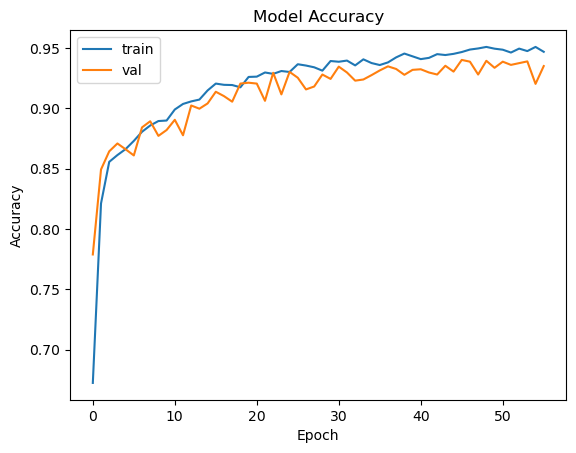

In [45]:
# crear un plot con la relacion de accuracy y loss con respecto a las epochs sin usar la función plot_model_history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


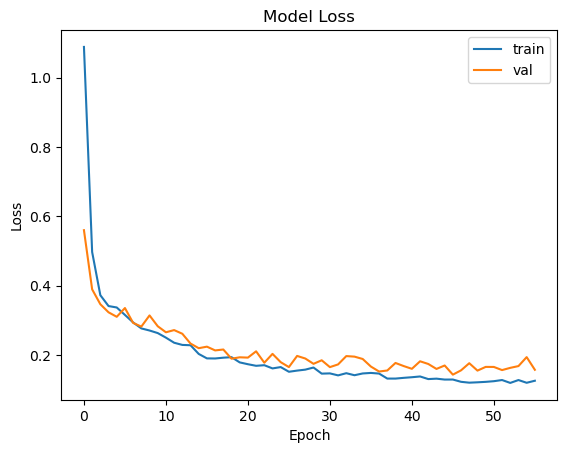

In [46]:
# crear un plot con la relacion de loss con respecto a las epochs sin usar la función plot_model_history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


24. Analiza y explica qué indica la gráfica del modelo
---
- Explica la gráfica de Accuracy
En esta gráfica, se puede ver un aumento constante en accuracy en la línea azul, lo que indica que el modelo está aprendiendo y mejorando su rendimiento en el conjunto de datos de entrenamiento a medida que se enttrenan más épocas. Sin embargo, la línea naranja (vallidación) fluctúa y tiende a disminuir después de aproximadamente 15 épocas. Esto podría indicar un sobreajuste donde el modelo se desempeña bien en los datos de entrenamiento pero tiene un peor rendimiento en los datos de validación.
- Explica la gráfica de Loss
Se ve cómo en el conjunto de datos, el modelo está aprendiendo y mejorando su rendimiento. Sin embargo con los datos de validación, las fluctuaciones podrían indicar que el modelo no está aprendiendo de manera efectiva.

- *Escribe aquí las respuestas

# 4. Mejorar la predicción

Mejorar la predicción y resultado de nuestro modelo es posible:

*   Aumentar el dataset o mejorar la calidad de los datos existentes.
*   **Optimizar hyperparámetros** de nuestro conjunto de datos y de nuestro modelo.

A continuación se pretende mejorar la predicción mediante la "*optimización de hyperparámetros*".

25. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del set de datos de entrenamiento y validación: random_state
---

In [115]:
# Escribe aquí el código
# Previamente, ya había añadido el parámetro random_state para evitar obtener resultados diferentes cada vez que se ejecute el código.
'''
X = df[['longitude', 'latitude', 'housing_median_age', 'median_income', 'room_per_household', 'households_per_population', 'person_per_room']]
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
y = labelEncoder.fit_transform(df['ocean_proximity'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = np_utils.to_categorical(labelEncoder.fit_transform(y_train))
y_test = np_utils.to_categorical(labelEncoder.fit_transform(y_test))
'''

"\nPreviamente, ya había añadido el parámetro random_state para evitar obtener resultados diferentes cada vez que se ejecute el código.\n\nX = df[['longitude', 'latitude', 'housing_median_age', 'median_income', 'room_per_household', 'households_per_population', 'person_per_room']]\nfrom sklearn.preprocessing import LabelEncoder\nlabelEncoder = LabelEncoder()\ny = labelEncoder.fit_transform(df['ocean_proximity'])\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\ny_train = np_utils.to_categorical(labelEncoder.fit_transform(y_train))\ny_test = np_utils.to_categorical(labelEncoder.fit_transform(y_test))\n"

*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.


26. Intenta mejorar la predicción del modelo anterior modificando los hyperparámetros de la creación del modelo: Nº de parámetros de las capas Densas
---

In [47]:
# Importar librerías keras
import keras.metrics as metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Activation
from keras.callbacks import EarlyStopping

# Crear el modelo secuencial
# Sólo una línea de código
model = Sequential()

# Añadir 5 capas Dense con sus propiedades como se indica en la implementación
# Siete líneas de código
model.add(Dense(80, input_dim=7, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))


# Compilar el modelo como se indica en la implementacióbn
# Sólo una línea de código
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [48]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, batch_size=200, callbacks=[es])

Epoch 1/500


83/83 [==============================] - 1s 7ms/step - loss: 1.2945 - accuracy: 0.5259 - val_loss: 0.9527 - val_accuracy: 0.6776
Epoch 2/500
83/83 [==============================] - 0s 4ms/step - loss: 0.9447 - accuracy: 0.6687 - val_loss: 0.6760 - val_accuracy: 0.7597
Epoch 3/500
83/83 [==============================] - 0s 4ms/step - loss: 0.7906 - accuracy: 0.7166 - val_loss: 0.5908 - val_accuracy: 0.7762
Epoch 4/500
83/83 [==============================] - 0s 5ms/step - loss: 0.7091 - accuracy: 0.7419 - val_loss: 0.5507 - val_accuracy: 0.7851
Epoch 5/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6562 - accuracy: 0.7559 - val_loss: 0.5132 - val_accuracy: 0.7902
Epoch 6/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6126 - accuracy: 0.7682 - val_loss: 0.4734 - val_accuracy: 0.7931
Epoch 7/500
83/83 [==============================] - 0s 4ms/step - loss: 0.5812 - accuracy: 0.7713 - val_loss: 0.4440 - val_accuracy: 0.7958
Epoch 8/500
83/83 [======

In [49]:
evaluation = model.evaluate(X_test, y_test)
evaluation

107/129 [=======================>......] - ETA: 0s - loss: 0.1480 - accuracy: 0.9366

129/129 [==============================] - 0s 2ms/step - loss: 0.1497 - accuracy: 0.9377


[0.14965301752090454, 0.9377422332763672]

*Explica aquí que resultados has obtenido con el intento de mejora de la predicción del modelo.

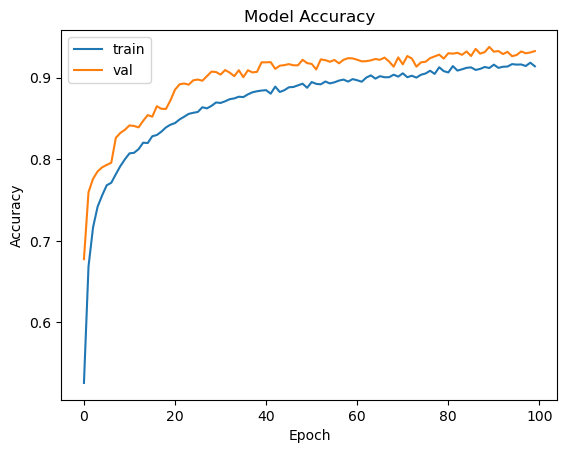

In [50]:
# crear un plot con la relacion de accuracy y loss con respecto a las epochs sin usar la función plot_model_history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()


El gráfico de accuracy se puede ver que la línea de validadción fluctúa mucho menos que antes, además, la línea de val se sitúa por encima de train y aunque se observan ciertos picos, estos nunca se superponen sobre la linea de train, el modelo ha dejado de sobreajustarse ni se aprecia apenas exploding gradient, lo que indica que el modelo ha mejorado.

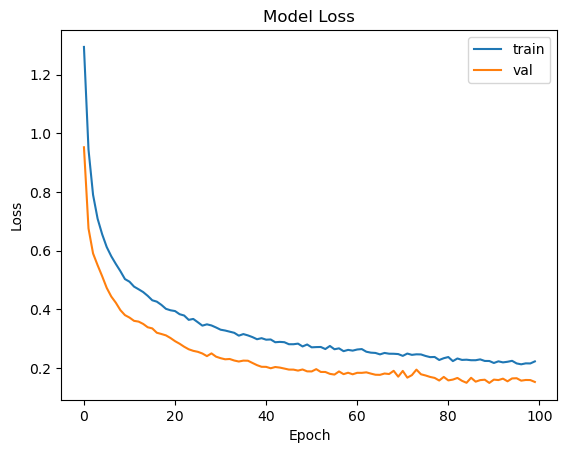

In [51]:
# crear un plot con la relacion de loss con respecto a las epochs sin usar la función plot_model_history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

Para mejorar el modelo se ha utilizado dropout y se han reducido las capas. Las líneas de accuracy y loss se han suavizado y el modelo ha mejorado su rendimiento, aunque en comparación con los resultados del modelo anterior haya descendido un poco el accuracy y aumentado el loss.